# 05 - Regularization & Polynomial Regression

The objective of parameter fitting for linear regression is to minimize the loss/cost function. In order to do this, the optimization algorithm tries to fit the values of the coefficients of each feature, such that the loss function is minimized. Sometimes, this leads to overfitting, as the coefficients of each variable are optimized for the data that the variable is trained on. This means that your (linear) regression model will not generalize well to other data than your current training data.

The process by which we penalize over-optimized coefficients in order to prevent this type of overfitting is called regularization. 

There are two broad types of regularization methods:
* Ridge regression 
* Lasso regression

In this exercise, we will apply both regularization methods on the dataset of housing prices as introduced in the previous exercise. The goal is to learn on how to apply regularization, even if this is on a linear model. As the regularization methods introduce further hyperparameters, we need to find the best values for these hyperparameters, which need to be set by the user and cannot be trained. For this purpose, we also introduce grid search, which is provided as a function by scikit-learn. Afterwards, we introduce the polynomial extension of the features for polynomial regression. 

Your task in the end is to apply regularization on the polynomial model.

**Note:** the dataset of housing prices is not necessarily the best dataset to see the benefits for regularization. The objective of this exercise is more on the practical application than on improving a model.

## Import necessary modules

Import numpy, pandas, and matplotlib with their standard aliases.


In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data

Prepare the filepath in the shared folder.

In [136]:
from pathlib import Path
import os

data_dir = str(Path.home()) + r'/coursematerial/GIS/GeoDataScience'

filepath = os.path.join(data_dir, r'HousingPrices.csv')

print(filepath)

/home/jovyan/coursematerial/GIS/GeoDataScience/HousingPrices.csv


Import the data provided in the shared folder.'

In [137]:
data = pd.read_csv(filepath)
data

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


Have a quick inspection of the data unsing known pandas methods.

In [138]:
data.head()
data[0:3]

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0


##   Explore the housing data

Have a quick view on the data features.

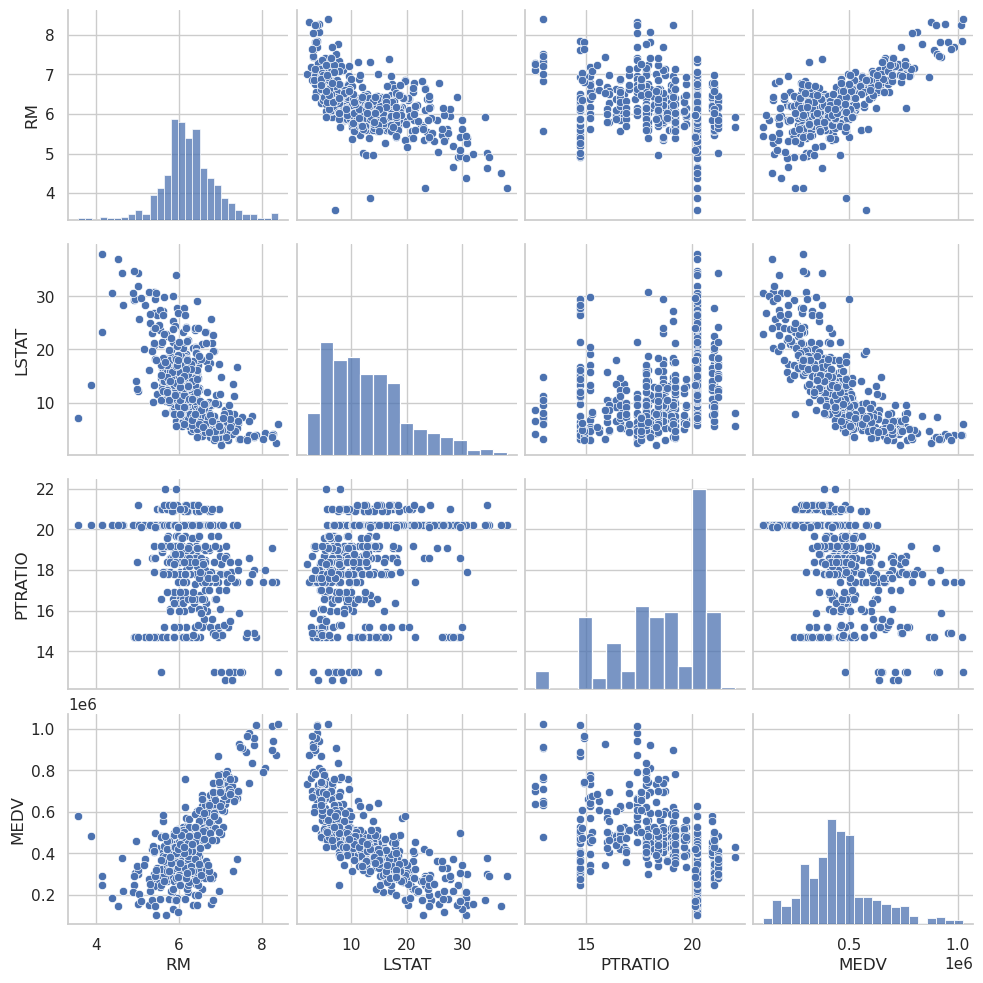

In [139]:
import seaborn as sns
sns.set (style = 'whitegrid', context = 'notebook')
_ = sns.pairplot(data, height = 2.5 )

## Feature Observation

As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):
- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

## Prepare the data as input for scikit-learn 

Since the main goal of this project is to construct a working model, which has the capability of predicting the value of houses, you will need to separate the dataset into **features** and the **target variable**. They must be NumPy arrays as input for the scikit-learn API.


The **features, 'RM', 'LSTAT', and 'PTRATIO'**, give us quantitative information about each data point. The **target variable, 'MEDV'**, will be the variable we seek to predict. 

In [140]:
column_names = data.columns
feature_names =column_names[:]
Target_name = column_names[-1]
print('Feature_Names:{}'.format(feature_names))
print('Target_names:{}'.format(column_names[-1]))

Feature_Names:Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')
Target_names:MEDV


### Train/test split for regression

Train and test sets are vital to ensure that the supervised learning model is able to generalize well to new data. This is equally true for linear regression models, as for classification  models.

We will split the housing dataset into training and testing sets, and then fit and predict a linear regression over **all features**.

**Please note that the split of data is random and your data might therefore lead to different results, which for this dataset could easily differ by 3% or more.**

In [141]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data,test_size = 0.30)
X_train = df_train[feature_names]
X_test = df_test[feature_names]
Y_train = df_train[Target_name]
Y_test = df_test[Target_name]

# Ridge regression
The equation for ridge regression is $RidgeLossFunction = OriginalLossFunction + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta_{i}^{2}$

As can be recognized, the ridge loss function is equal to the ordinary least squares loss function plus alpha divided by 2 times the sum of the squared feature parameters. 

$\alpha$ is a parameter that we can optimize in order to control the amount by which the ridge loss function penalizes the coefficients, in order to prevent overfitting. Obviously, if $\alpha$ is equal to 0, the ridge loss function is equal to the ordinary least squares loss function, thereby making no difference to the initial overfit model. 

Therefore, optimizing this value of $\alpha$ provides the optimal model that can generalize beyond the data that it has trained on. 

In [142]:
from sklearn.linear_model import Ridge

Initialize a ridge regression model.

In [143]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.1)

Remember you can get the class documentation with **?**.

In [144]:
Ridge?

Init signature:
Ridge(
    alpha=1.0,
    *,
    fit_intercept=True,
    normalize='deprecated',
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    positive=False,
    random_state=None,
)
Docstring:     
Linear least squares with l2 regularization.

Minimizes the objective function::

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
This estimator has built-in support for multi-variate regression
(i.e., when y is a 2d-array of shape (n_samples, n_targets)).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : {float, ndarray of shape (n_targets,)}, default=1.0
    Constant that multiplies the L2 term, controlling regularization
    strength. `alpha` must be a non-negative float i.e. in `[0, inf)`.

    When `alpha = 0`, the objective is equival

Fit the model to the training data.

In [145]:
reg.fit(X_train,Y_train)

Ridge(alpha=0.1)

Predict on test data.

In [146]:
y_pred = reg.predict(X_test)
y_pred

array([501900.        , 394800.        , 373800.        , 651000.        ,
       506100.        , 151200.        , 474600.        , 455700.        ,
       422100.        , 105000.        , 405300.        , 174300.        ,
       132300.        , 289800.        , 913500.        , 390600.        ,
       504000.        , 590100.        , 396900.        , 527100.        ,
       249899.99999999, 327600.00000001, 304500.        , 281400.        ,
       283500.        , 835799.99999999, 491400.        , 199500.        ,
       577499.99999999, 279300.        , 445200.        , 254100.        ,
       525000.        , 512400.        , 466200.        , 483000.        ,
       386400.        , 357000.00000001, 361200.        , 585899.99999999,
       319200.        , 445200.        , 464100.        , 170100.        ,
       621600.        , 403200.        , 438900.        , 245700.00000001,
       146999.99999999, 676200.        , 506100.        , 365400.        ,
       403200.        , 3

Extract the score from the test data.

In [147]:
reg.score(X_test, Y_test)

1.0

## Find the optimal value for $\alpha$
The accuracy of this model is exactly the same as the accuracy of the model that we built without the ridge regression as the parameter that controls how the model is optimized; $\alpha$ is set to 0. 

In order to obtain the optimal value of $\alpha$, the **GridSearchCV** algorithm can be used.

In [148]:
from sklearn.model_selection import GridSearchCV

Construct a ridge regression (model) class without specifying any parameters.

In [149]:
from sklearn.linear_model import Ridge
model=Ridge()
model

Ridge()

Construct a **GridSearchCV** object that is used to search for the best parameter of $\alpha$. The first argument to the function is an estimator object that follows the interface specified by scikit-learn, which e.g. must provide a score function to evaluate the predictor. The second argument is a dictionary that specifies for a parameter (given as a key to the dictionary) the values to try out (given as a list of values for this parameter). In this example, we want the grid search to use ridge regression and try out for the hyperparameter **alpha** the values 0.0001, 0.001, 0.01, 0.1, and 10. Applying the **fit()** function to the **GridSearchCV** object will fit different models according to the hyperparameters specified and provides us with the best parameters.

In [150]:
parameters ={'alpha' :[0.0,0.001,0.01,0.1,10]}
grid = GridSearchCV(model,parameters)
grid.fit(X_train, Y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.0, 0.001, 0.01, 0.1, 10]})

Print the best parameter that grid search found.

In [151]:
print("The most optimal value of alpha is:", grid.best_params_)

The most optimal value of alpha is: {'alpha': 0.0}


Let us try this best $\alpha$ value with our own model. Change the $\alpha$ value, if your grid search resulted in a different value.

In [152]:
ridge_regression = Ridge(alpha = 0.1)
ridge_regression.fit(X_train,Y_train)
print('Score on training data:', ridge_regression.score(X_train,Y_train))
print('Score on test data:', ridge_regression.score(X_test, Y_test))

Score on training data: 1.0
Score on test data: 1.0


When you compare the score on the test data with the score from the original regression computed above, you notice that it is slightly worse than the one from ridge regression with $\alpha$ being equal to 0. This seems odd, so let us investigate this further.

In order to verify the results that the GridSearchCV algorithm has provided us with, we will construct a plot between the accuracy scores on the y-axis and the different values of $\alpha$ along the x-axis, for both the training and test data.

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


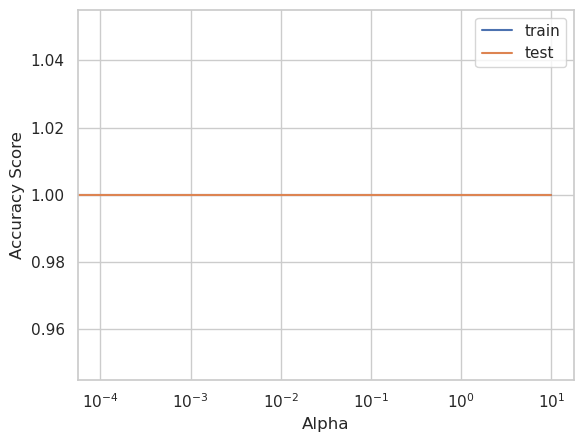

In [153]:
import matplotlib.pyplot as plt
train_errors = []
test_errors = []
alpha_list = [0.0, 0.0001, 0.001, 0.01, 0.1, 10]
for value in alpha_list:
        ridge_regression = Ridge(alpha = value)#, normalize=True)
        ridge_regression.fit(X_train, Y_train)
        train_errors.append(ridge_regression.score(X_train, Y_train) )
        test_errors.append(ridge_regression.score(X_test, Y_test))

        
plt.semilogx(alpha_list, train_errors, alpha_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('Alpha')

print(train_errors)
print(test_errors)

Since our initial model was already well optimized, the reported accuracy score did not increase by an observable amount (and might even have decreased). **Depending on the split of the data, the accuracy of test and train might be better or worse.** However, on datasets with larger dimensions/features, ridge regression holds immense value for providing you with a model that generalizes well, without overfitting.

**Try not to interpret too much into the plot, as running the same code on this dataset might change the results due to the randomness of the split. You can verify this by calling "Restart kernel and run up to Selected Cell" from the Kernel menu.** 

# Lasso regression
The equation for lasso regression is $LassoLossFunction = OriginalLossFunction + \alpha\sum_{i=1}^{n}|\theta_{i}|$

In the preceding equation, the lasso loss function is equal to the original loss function plus the product of the absolute value of the coefficients of each feature and $\alpha$. 

$\alpha$ is a parameter that we can optimize to control the amount by which the lasso loss function penalizes the coefficients, in order to prevent overfitting. Once again, if $\alpha$ is equal to 0, the lasso loss function is equal to the original loss function, thereby making no difference to the initial overfitted model. 

Therefore, optimizing this value of $\alpha$ provides the optimal model that generalizes well beyond the data that it has trained on. 

In [154]:
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, Y_train)
lasso_reg.score(X_test,Y_test)

1.0

The preceding code is very similar to the code that we used to build the ridge regression model; the only difference is the **Lasso()** constructor, which we use to initialize a lasso regression model.

In order to optimize the value of alpha, we use the GridSearchCV algorithm. 

In [155]:
from sklearn.model_selection import GridSearchCV
lasso_regression = Lasso()
grid = GridSearchCV(lasso_regression, {'alpha':[0.0001, 0.001, 0.01, 0.1, 10]})
grid.fit(X_train, Y_train)
print("The most optimal value of alpha is:", grid.best_params_)

The most optimal value of alpha is: {'alpha': 0.0001}


Try the best model. Change the $\alpha$ value, if your grid search resulted in a different value.

In [156]:
# there is something wrong with entire model
lasso_regression = Lasso(alpha = 0.01)
lasso_regression.fit(X_train, Y_train)
lasso_regression.score(X_test, Y_test)

1.0

# Polynomial regression

There were some issues with our model from the previous lab:

   + The plots do not look very linear, and a linear model is not able to capture this non-linearity.
    
   + Although we cannot turn a linear model into a non-linear one, we can still transform the data instead. This is the idea of polynomial regression.
    
   + Think of it this way: if $y$ is a function of $x^2$, we can either use a non-linear model — one that is capable of capturing the quadratic relation between $x$ and $y$ — or we can just calculate $x^2$ and give it to a linear model instead of $x$. Furthermore, linear regression algorithms do not capture feature interactions.
    
   + The current model cannot capture interactions between multiple features

A polynomial transformation can solve both the non-linearity and feature interaction issues for us. Given the original data, scikit-learn's **PolynomialFeatures** class will transform the features into higher dimensions (for example, it will add the quadratic and cubic values for each feature). Additionally, it will also add the products to each feature-pair (or triplets). PolynomialFeatures works in a similar fashion to the regression object we used in the previous exercise. We are going to use its **fit_transform** method and a **transform()** method, as follows:

In [157]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)
print(x_train_poly.shape)
print(x_test_poly.shape)

(342, 15)
(147, 15)


To get both the quadratic and cubic feature transformation, we set the degree parameter to 2.

One annoying thing about PolynomialFeatures is that it does not keep track of the DataFrame's column names. It replaces the feature names with $x0$, $x1$, $x2$, and so on. 

In [158]:
print(poly.get_feature_names_out())

['1' 'RM' 'LSTAT' 'PTRATIO' 'MEDV' 'RM^2' 'RM LSTAT' 'RM PTRATIO'
 'RM MEDV' 'LSTAT^2' 'LSTAT PTRATIO' 'LSTAT MEDV' 'PTRATIO^2'
 'PTRATIO MEDV' 'MEDV^2']


We will use our Python skills to reclaim our column names. We first generate a list of pairs with the x ($x0$, $x1$, $x2$) feature names and the real feature names.

In [159]:
feature_translator = [(f'x{i}', feature) for i, feature in enumerate(X_train.columns, 0)]
feature_translator

[('x0', 'RM'), ('x1', 'LSTAT'), ('x2', 'PTRATIO'), ('x3', 'MEDV')]

Then, define a function that replaces each x feature name with the feature names according to the list of pairs we just generated.

In [160]:
def translate_feature_names(s):
    for key, val in feature_translator:
        s = s.replace(key, val)
        return s

And apply this function on the feature names to get a new list of meaningful feature names.

In [161]:
poly_features = [translate_feature_names(f) for f in poly.get_feature_names()]
len(poly_features)
poly_features
print(poly_features)

['1', 'RM', 'x1', 'x2', 'x3', 'RM^2', 'RM x1', 'RM x2', 'RM x3', 'x1^2', 'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2']


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Fit linear regression with the derived features

Now, we are ready to use our linear regressor with the newly transformed features. One thing to keep in mind is that the PolynomialFeatures transformer adds one additional column where all the values are 1. The coefficient this column gets after training is equivalent to the intercept. So, we will not fit an intercept by setting fit_intercept=False when training our regressor this time:

In [162]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False)
reg.fit(x_train_poly, Y_train)

LinearRegression(fit_intercept=False)

Check the score for the training data.

In [163]:
lin_reg.score(x_train_poly,Y_train)

1.0

And also for the test data.

In [164]:
lin_reg.score(x_test_poly,Y_test)

1.0

It should show better accuracies than without the polynomials.

Let us predict also some y-values for the test data.

In [165]:
y_predict = lin_reg.predict(x_test_poly)
y_predict

array([501899.99997988, 394799.99998755, 373799.99998884, 650999.99996615,
       506099.99997954, 151199.99999817, 474599.99998201, 455699.99998342,
       422099.99998577, 104999.99999912, 405299.99998688, 174299.99999757,
       132299.9999986 , 289799.99999329, 913499.99993336, 390599.99998782,
       503999.99997971, 590099.99997219, 396899.99998742, 527099.99997781,
       249899.99999501, 327599.99999143, 304499.9999926 , 281399.99999368,
       283499.99999358, 835799.99994421, 491399.99998072, 199499.99999682,
       577499.99997336, 279299.99999377, 445199.99998417, 254099.99999484,
       524999.99997799, 512399.99997903, 466199.99998264, 482999.99998137,
       386399.99998808, 356999.99998982, 361199.99998958, 585899.99997258,
       319199.99999186, 445199.99998417, 464099.9999828 , 170099.99999769,
       621599.99996914, 403199.99998702, 438899.99998462, 245699.99999518,
       146999.99999827, 676199.99996348, 506099.99997954, 365399.99998934,
       403199.99998702, 3

So that we finally can print some metrics like the $R^2$, $MAE$ (mean absolute error), and $MSE$ (mean squared error). (The best value for a $R^2$ score is 1.0.)

In [166]:
# there is an issue with my MSE and MAE values
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
R2_regressor = r2_score(Y_test, y_predict)
MAE_regressor = mean_absolute_error(Y_test,y_predict)
MSE_regressor = mean_squared_error(Y_test,y_predict)
print('R2_Regressor = {:.2f}' .format(R2_regressor))
print('MAE_regressor ={:.2f}'.format(MAE_regressor))
print('MSE_regressor ={:.2f}'.format(MSE_regressor))

R2_Regressor = 1.00
MAE_regressor =0.00
MSE_regressor =0.00


# Exercises

## Task 1 - Polynomials up to degree 3

Try a model that takes polynomials up to degree 3 and see if this improves your scores.

In [167]:
# my model is not good 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)
reg = LinearRegression(fit_intercept=False)
reg.fit(x_train_poly, Y_train)
reg.score(x_train_poly, Y_train)
reg.score(x_test_poly, Y_test)
y_pred = reg.predict(x_test_poly)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
R2_regressor = r2_score(Y_test, y_predict)
MAE_regressor = mean_absolute_error(Y_test,y_pred)
MSE_regressor = mean_squared_error(Y_test,y_pred)
print('R2_Regressor = {:.2f}' .format(R2_regressor))
print('MAE_regressor ={:.2f}'.format(MAE_regressor))
print('MSE_regressor ={:.2f}'.format(MSE_regressor))


R2_Regressor = 1.00
MAE_regressor =0.29
MSE_regressor =0.17


Did you get worse results?

One major problem with the ordinary least squares regression algorithm is that it does not work well with highly correlated features (multicollinearity).

The polynomial feature transformation approach — where we add features, their squared and cubic values, and the product of the features' pairs and triples — will very likely give us multiple correlated features. This multi-collinearity harms the model's performance. Furthermore, if you print the shape of x_train_poly, you will see that it has few samples and many features. This is another problem known as the curse of dimensionality.

## Task 2 - Ridge regularization

Apply ridge regularization in order to regularize the polynomial model. Use grid search for finding the appropriate regularization coefficients!

In [168]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_regression = Ridge()
grid = GridSearchCV(ridge_regression, {'alpha' : [0.0, 0.0001, 0.001, 0.01, 0.1, 1]})
grid.fit(X_train,Y_train)
print(grid.best_params_)

# the best alpha for my output isnt the best





{'alpha': 0.0}


## Task 3 - Lasso regularization

Apply lasso regularization in order to regularize the polynomial model. Use grid search for finding the appropriate regularization coefficients!

In [177]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_regression = Lasso()
grid = GridSearchCV(lasso_regression, {'alpha' : [0.0, 0.0001, 0.001, 0.01, 0.1, 1]})
grid.fit(X_train,Y_train)
print(grid.best_params_)


{'alpha': 0.0}


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9